In [1]:
%pip install pandas
%pip install opencv-python
%pip install matplotlib
%pip install nbformat


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
%matplotlib inline
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import os

In [3]:
header_names = ["image_name", "face_id_in_image", "face_box_top", "face_box_left", "face_box_right", "face_box_bottom" ,"face_box_confidence", "expression_label"]
label_df = pd.read_csv("../../data/raw/expw/label/label.csv",names=header_names,  delimiter=" ", index_col=False)

label_df.head()

,image_name,face_id_in_image,face_box_top,face_box_left,face_box_right,face_box_bottom,face_box_confidence,expression_label
0,angry_actor_104.jpg,0,28,113,226,141,22.9362,0
1,angry_actor_109.jpg,0,31,157,345,219,50.3056,0
2,angry_actor_120.jpg,1,53,53,372,372,13.9434,2
3,angry_actor_13.jpg,0,77,51,362,388,85.8104,3
4,angry_actor_132.jpg,0,95,31,412,476,82.3948,0


In [4]:
expression_labels = {
    0: "angry",
    1: "disgust",
    2: "fear",
    3: "happy",
    4: "sad",
    5: "surprise",
    6: "neutral",
}

In [5]:
low_confidence_df = label_df[label_df.face_box_confidence < 50.0]
low_confidence_df.head()

,image_name,face_id_in_image,face_box_top,face_box_left,face_box_right,face_box_bottom,face_box_confidence,expression_label
0,angry_actor_104.jpg,0,28,113,226,141,22.93620,0
2,angry_actor_120.jpg,1,53,53,372,372,13.94340,2
6,angry_actor_139.jpg,0,0,0,1127,1127,33.52480,0
7,angry_actor_14.jpg,0,13,120,200,93,39.75540,0
8,angry_actor_147.jpg,1,119,47,142,214,8.79739,6


In [17]:
sample_df = low_confidence_df.sample(20, random_state=42)

# Margin size
margin = 10

low_confidence_images = []
img_folder_path = "../../data/raw/expw/img/"
for index, row in sample_df.iterrows():
    img = cv2.imread(img_folder_path + row["image_name"])
    adjusted_top = max(row["face_box_top"] - margin, 0)
    adjusted_bottom = min(row["face_box_bottom"] + margin, img.shape[0])
    adjusted_left = max(row["face_box_left"] - margin, 0)
    adjusted_right = min(row["face_box_right"] + margin, img.shape[1])
    cv2.rectangle(
        img,
        (adjusted_left, adjusted_top),
        (adjusted_right, adjusted_bottom),
        (0, 0, 255),
        2,
    )
    image_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    low_confidence_images.append(image_rgb)




In [7]:
# sample_folder_path = "../../data/processed/samples/low_confidence/"

# if not os.path.exists(sample_folder_path):
#     os.makedirs(sample_folder_path)

# for i, img in enumerate(low_confidence_images):


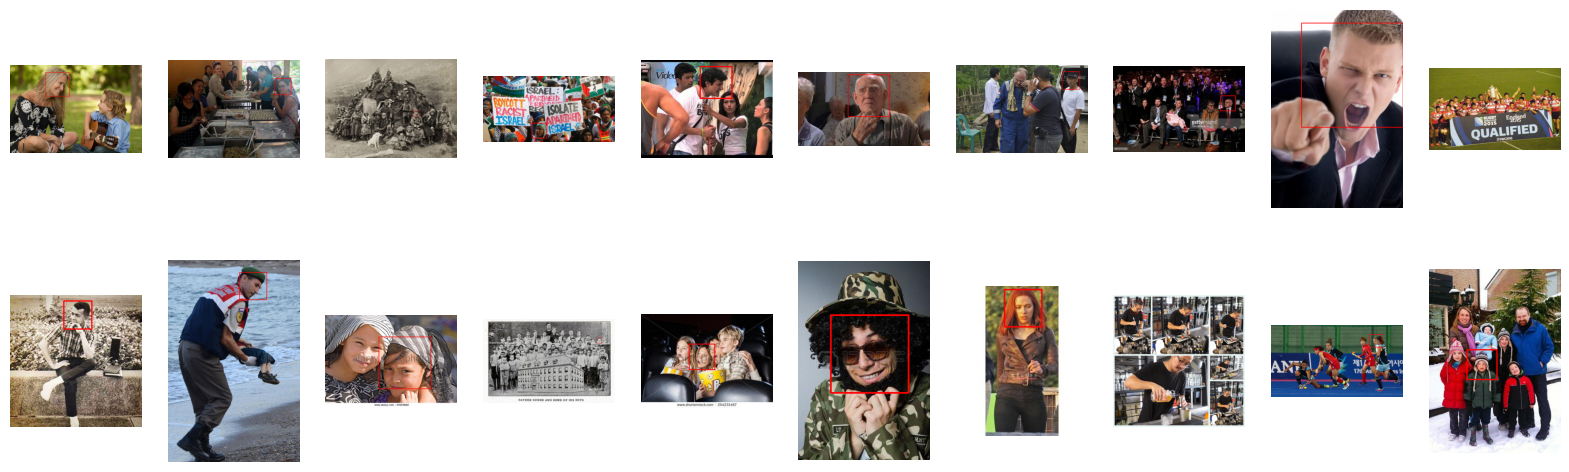

In [18]:
fig, ax = plt.subplots(2, 10, figsize=(20, 6))
for i, img in enumerate(low_confidence_images):
    row, col = divmod(i, 10)
    ax[row, col].imshow(img)
    ax[row, col].axis("off")

plt.show()